# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
name = []
lat = []
lon = []
temp = []
wind = []
hum = []
country = []
cloud = []
date = []
series = 0
for i in cities:
    try:
        series += 1
        response = requests.get(url + i).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloud.append(response['clouds']['all'])
        print(f"Pulling info on city {series}: {i}")
    except (KeyError, IndexError):
        print('Error, city not found! Skipping...')

Pulling info on city 1: yellowknife
Pulling info on city 2: ilulissat
Pulling info on city 3: georgetown
Pulling info on city 4: rikitea
Pulling info on city 5: ushuaia
Pulling info on city 6: clyde river
Pulling info on city 7: mataura
Pulling info on city 8: necochea
Pulling info on city 9: saint george
Pulling info on city 10: vaini
Pulling info on city 11: kodiak
Error, city not found! Skipping...
Pulling info on city 13: kapaa
Pulling info on city 14: salalah
Pulling info on city 15: hearst
Pulling info on city 16: jamestown
Pulling info on city 17: butaritari
Pulling info on city 18: bilma
Pulling info on city 19: bardiyah
Pulling info on city 20: magistralnyy
Pulling info on city 21: tasiilaq
Pulling info on city 22: santiago
Pulling info on city 23: bilibino
Error, city not found! Skipping...
Pulling info on city 25: punta arenas
Pulling info on city 26: north vernon
Pulling info on city 27: muroto
Pulling info on city 28: avarua
Pulling info on city 29: lompoc
Pulling info on 

Pulling info on city 236: bethel
Pulling info on city 237: kawalu
Pulling info on city 238: tuatapere
Error, city not found! Skipping...
Pulling info on city 240: colares
Pulling info on city 241: klaksvik
Pulling info on city 242: moncagua
Pulling info on city 243: coihaique
Error, city not found! Skipping...
Pulling info on city 245: alofi
Pulling info on city 246: bay roberts
Error, city not found! Skipping...
Pulling info on city 248: sobolevo
Pulling info on city 249: baiyin
Error, city not found! Skipping...
Pulling info on city 251: mahon
Pulling info on city 252: boende
Pulling info on city 253: bafq
Pulling info on city 254: shimoda
Pulling info on city 255: faanui
Pulling info on city 256: havelock
Pulling info on city 257: lavrentiya
Pulling info on city 258: talnakh
Error, city not found! Skipping...
Pulling info on city 260: santa isabel do rio negro
Pulling info on city 261: sao sebastiao
Pulling info on city 262: east london
Pulling info on city 263: vestmannaeyjar
Pulli

Pulling info on city 471: san jose
Pulling info on city 472: melo
Pulling info on city 473: atlantic city
Pulling info on city 474: guarda
Pulling info on city 475: tysmenytsya
Pulling info on city 476: shiraz
Pulling info on city 477: leca da palmeira
Pulling info on city 478: nhulunbuy
Pulling info on city 479: chernyshevskiy
Pulling info on city 480: trairi
Pulling info on city 481: tukums
Pulling info on city 482: halifax
Pulling info on city 483: prince rupert
Pulling info on city 484: zheleznodorozhnyy
Error, city not found! Skipping...
Pulling info on city 486: san cristobal
Pulling info on city 487: hargeysa
Pulling info on city 488: shingu
Pulling info on city 489: pestovo
Pulling info on city 490: marion
Pulling info on city 491: vila nova de milfontes
Pulling info on city 492: jishou
Pulling info on city 493: doba
Pulling info on city 494: port hedland
Pulling info on city 495: katobu
Pulling info on city 496: great yarmouth
Pulling info on city 497: bua yai
Pulling info on 

In [5]:
print(len(cities))
print(len(name))

597
547


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
DF = pd.DataFrame({'City': name, 'Lat': lat, 'Lng': lon, 'Max Temp': temp, 'Humidity': hum, 'Cloudiness': cloud, 'Wind Speed': wind, 'Country': country, 'Date': date})
DF.to_csv("../Data/cities.csv", index=False, header=True)
DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,0.00,65,75,9.22,CA,1614803321
1,Ilulissat,69.2167,-51.1000,33.80,51,75,10.36,GL,1614803332
2,George Town,5.4112,100.3354,81.00,88,20,4.38,MY,1614803139
3,Rikitea,-23.1203,-134.9692,79.05,77,56,9.06,PF,1614803332
4,Ushuaia,-54.8000,-68.3000,57.20,44,40,3.44,AR,1614803199


In [7]:
DF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.866663,11.533880,53.539835,70.153565,51.546618,8.670676,1.614803e+09
std,33.823417,90.074121,29.846732,21.823346,39.253930,6.752123,7.998568e+01
min,-54.800000,-179.166700,-41.240000,6.000000,0.000000,0.430000,1.614803e+09
25%,-7.926800,-66.638950,35.600000,59.500000,8.000000,4.070000,1.614803e+09
50%,24.100000,15.159400,62.010000,76.000000,51.000000,7.160000,1.614803e+09
75%,48.917550,85.781800,77.045000,87.000000,90.000000,11.500000,1.614803e+09
max,78.218600,178.416700,105.780000,100.000000,100.000000,50.640000,1.614803e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
DF_lowerhum = DF[DF['Humidity'] <= 100]
DF_lowerhum.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,0.00,65,75,9.22,CA,1614803321
1,Ilulissat,69.2167,-51.1000,33.80,51,75,10.36,GL,1614803332
2,George Town,5.4112,100.3354,81.00,88,20,4.38,MY,1614803139
3,Rikitea,-23.1203,-134.9692,79.05,77,56,9.06,PF,1614803332
4,Ushuaia,-54.8000,-68.3000,57.20,44,40,3.44,AR,1614803199


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

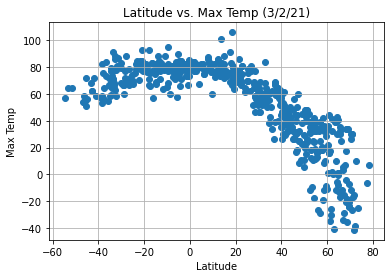

In [11]:
plt.scatter(DF['Lat'], DF['Max Temp'])
plt.title('Latitude vs. Max Temp (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)
plt.savefig("../Images/Lat vs. Max Temp.png")
plt.show()

## Latitude vs. Humidity Plot

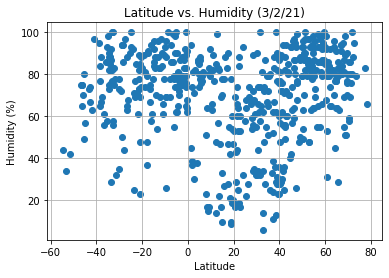

In [13]:
plt.scatter(DF['Lat'], DF['Humidity'])
plt.title('Latitude vs. Humidity (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("../Images/Lat vs. Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

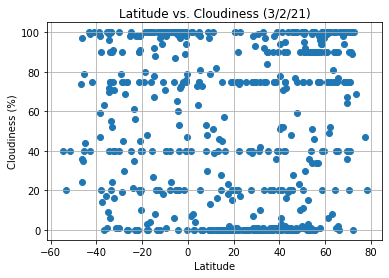

In [15]:
plt.scatter(DF['Lat'], DF['Cloudiness'])
plt.title('Latitude vs. Cloudiness (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("../Images/Lat vs. Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

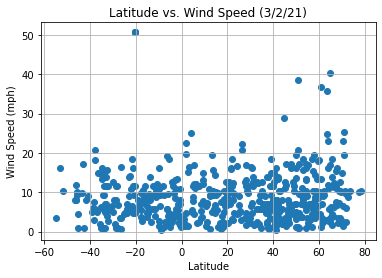

In [16]:
plt.scatter(DF['Lat'], DF['Wind Speed'])
plt.title('Latitude vs. Wind Speed (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("../Images/Lat vs. Wind.png")
plt.show()

## Linear Regression

In [17]:
NorthDF = DF[DF['Lat'] > 0]
SouthDF = DF[DF['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.8633876035941286


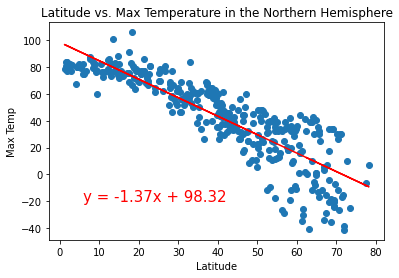

In [18]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Max Temp"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Max Temp'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Max Temp'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (6,-20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = 0.5402698761357262


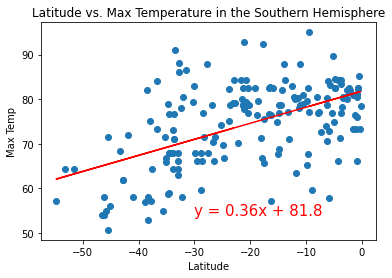

In [21]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Max Temp"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Max Temp'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Max Temp'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-30,54), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.35988976602435563


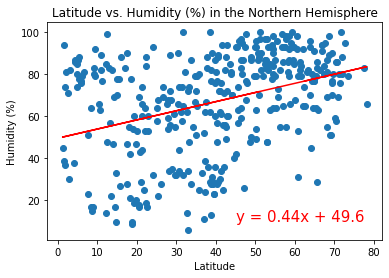

In [24]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Humidity"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Humidity'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Humidity'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (45,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.19735510478435705


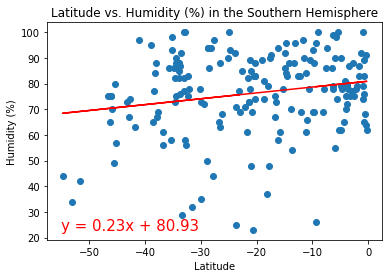

In [27]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Humidity"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Humidity'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Humidity'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-55,23), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.32630568717578823


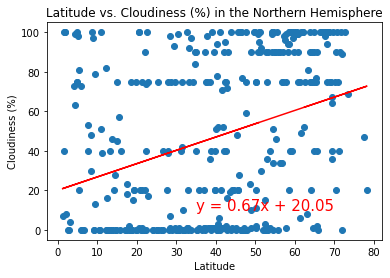

In [28]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Cloudiness"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Cloudiness'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Cloudiness'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (35,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.1376245668607246


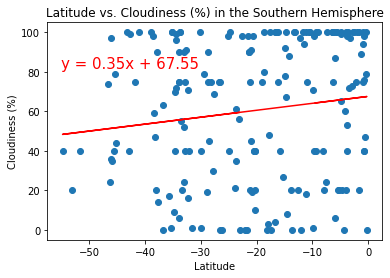

In [30]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Cloudiness"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Cloudiness'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Cloudiness'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-55,82), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.09508336542413451


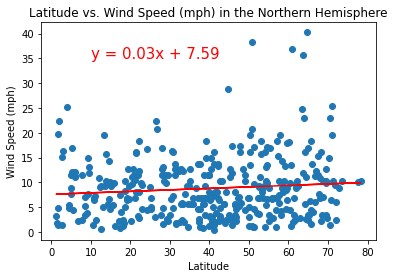

In [31]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Wind Speed"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Wind Speed'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Wind Speed'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (10,35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = -0.10264888845042663


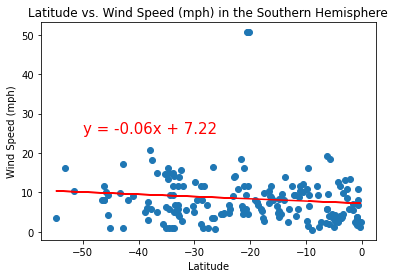

In [33]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Wind Speed"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Wind Speed'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Wind Speed'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) in the Southern Hemisphere')
plt.show()